#  Predicting House Prices with Gradient Descent.

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 


Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [2]:
import numpy as np
import pandas as pd

### 1. Reading 

In [3]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)

datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [4]:
!pip install seaborn

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

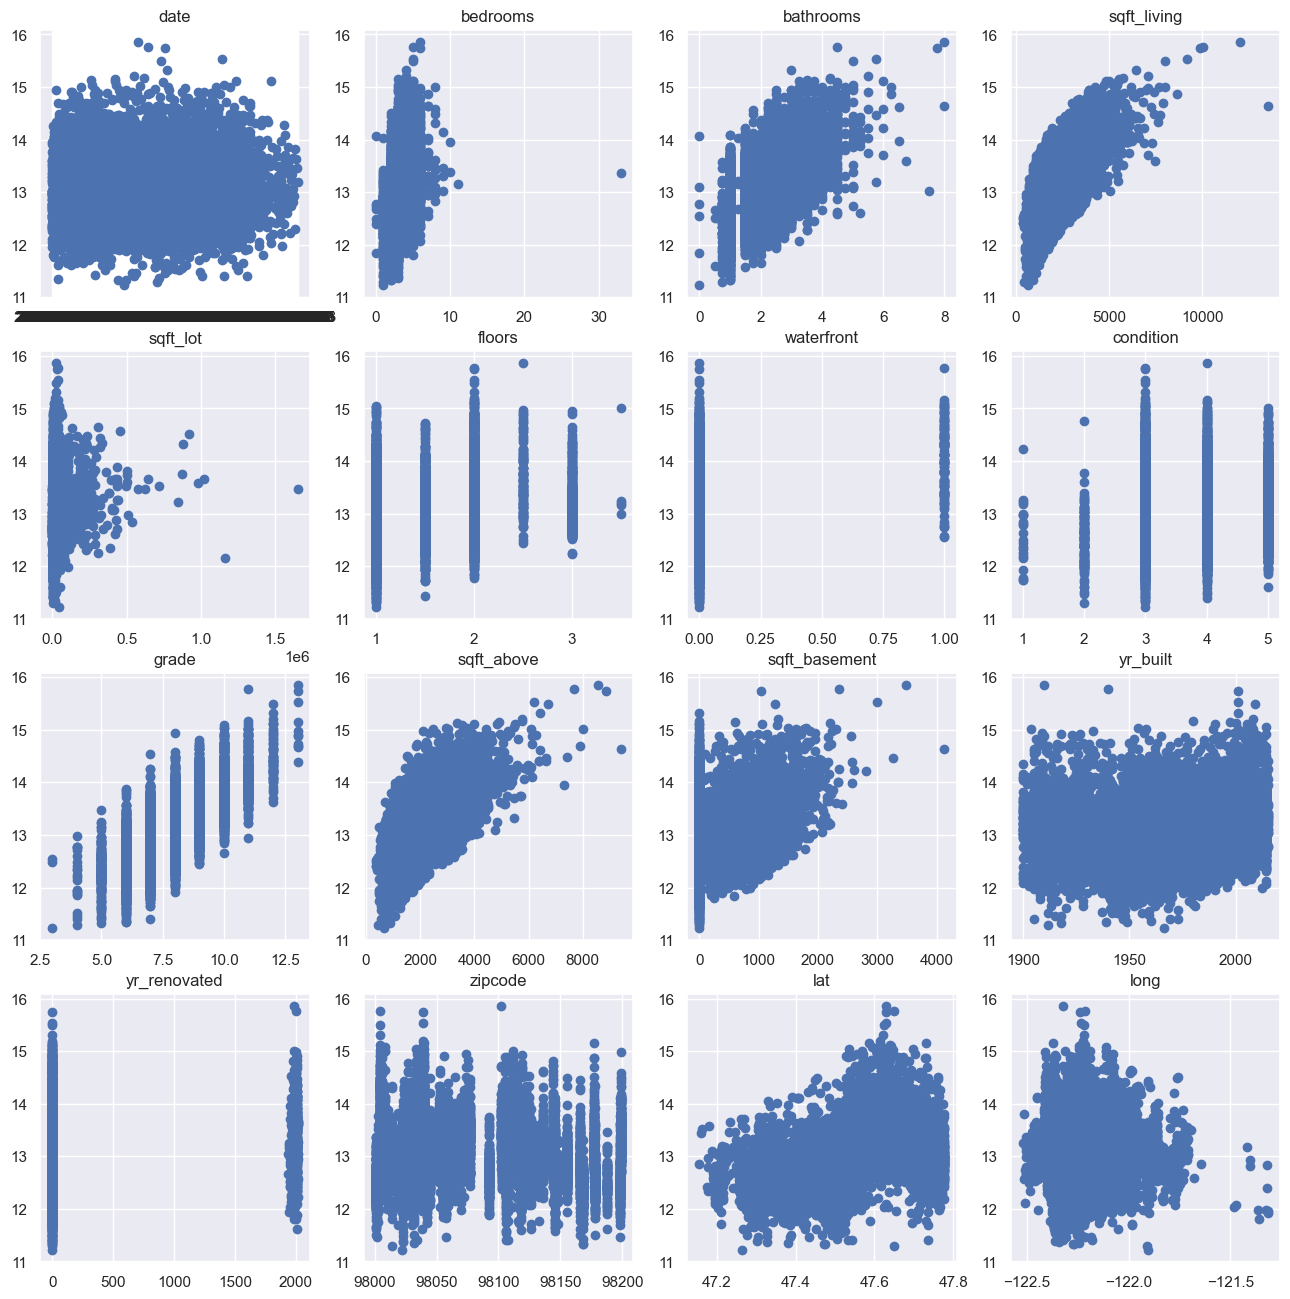

In [6]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [7]:

features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']
X= datX[features].to_numpy()
N, m = X.shape

# Show matrix X
print(X)

[[ 5.00000000e+00  3.25000000e+00  3.71000000e+03 ...  1.20000000e+03
  -1.22046997e+02  4.76100998e+01]
 [ 3.00000000e+00  1.75000000e+00  2.82000000e+03 ...  1.28000000e+03
  -1.22375999e+02  4.75093994e+01]
 [ 3.00000000e+00  1.00000000e+00  1.24000000e+03 ...  0.00000000e+00
  -1.22045998e+02  4.74303017e+01]
 ...
 [ 2.00000000e+00  1.00000000e+00  6.40000000e+02 ...  0.00000000e+00
  -1.22359001e+02  4.75149994e+01]
 [ 3.00000000e+00  1.00000000e+00  1.63000000e+03 ...  0.00000000e+00
  -1.22317001e+02  4.77547989e+01]
 [ 2.00000000e+00  1.00000000e+00  7.20000000e+02 ...  0.00000000e+00
  -1.22403999e+02  4.76534004e+01]]


Run the following cells to automatically check results of your code:

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### 2. Compute analytically the $Loss(\vec{w})$  function 
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [8]:
def loss(w, X, y):
    X_changed = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    y_pred = np.dot(X_changed, w) 
    N = X_changed.shape[0]
    lossValue = (1/N)*np.sum(np.square(y - y_pred))
    return lossValue



Run the following cells to automatically check results of your code.

### 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ 
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

$$∇𝐿𝑜𝑠𝑠(w) = \begin{bmatrix}
  \frac{dLoss}{dw_0} \\
  \frac{dLoss}{dw_1} \\
  ... \\
  \frac{dLoss}{dw_j} \\
\end{bmatrix} $$
$$\frac{dLoss}{dw_j} =
-\frac{2}{N}\sum_{i=1}^N x_{ij}(y_i-\hat{y}_i) = -\frac{2}{N}x_j^T (y_i-\hat{y}_i)$$
$$\hat{y} = Xw$$
$$∇𝐿𝑜𝑠𝑠(w) =-\frac{2}{N}*X^T(y-Xw)$$

### 4. Write a function to compute the gradient of the Loss function in the given point  
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. 


In [9]:
def grad(w_k, X, y):
    X_changed = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    y_pred = np.dot(X_changed, w_k) 
    N = X_changed.shape[0]
    lossGradient = -(2/N) * X_changed.T.dot(y - y_pred)
    return lossGradient

Run the following cells to automatically check your function. 

### 5. Write gradient descent 
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [10]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]
    curiter=0
    w_k=weights[-1]
    
    #your code goes here
    while curiter < maxiter:
        gradient = grad(w_k, X, y)
        if np.linalg.norm(gradient) < eps:
            print(f"Converged after {curiter} iterations.")
            break
        w_k = w_k - alpha * gradient
        lossValue_k= loss(w_k, X, y)
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1   
    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

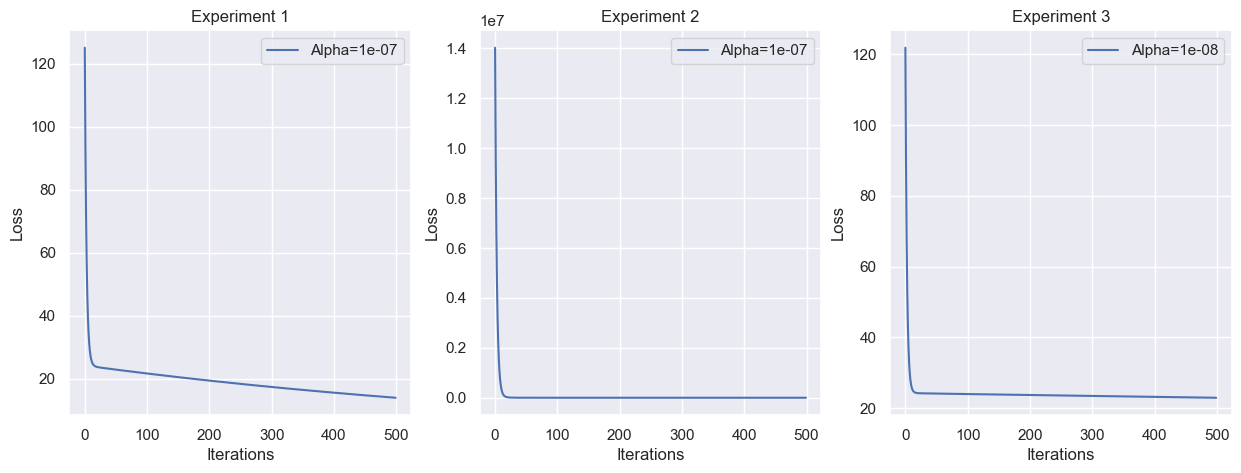

In [11]:
# Experiment 1
alpha_1 = 0.0000001
w_init_1 = np.zeros(X.shape[1] + 1)
weights_1, losses_1 = gradDescent(w_init_1, alpha_1, X, datY)

# Experiment 2
alpha_2 = 0.0000001
w_init_2 = np.ones(X.shape[1] + 1)
weights_2, losses_2 = gradDescent(w_init_2, alpha_2, X, datY)

# Experiment 3
alpha_3 = 0.00000001
w_init_3 = np.zeros(X.shape[1] + 1)
weights_3, losses_3 = gradDescent(w_init_3, alpha_3, X, datY)

# Plot Loss over Iterations
plt.figure(figsize=(15, 5))
# Experiment 1
plt.subplot(1, 3, 1)
plt.plot(losses_1, label=f'Alpha={alpha_1}')
plt.title('Experiment 1')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Experiment 2
plt.subplot(1, 3, 2)
plt.plot(losses_2, label=f'Alpha={alpha_2}')
plt.title('Experiment 2')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Experiment 3
plt.subplot(1, 3, 3)
plt.plot(losses_3, label=f'Alpha={alpha_3}')
plt.title('Experiment 3')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.show()

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [12]:
# Experiment 1
selected_houses = X[:10, :]
selected_houses_changed = np.concatenate([np.ones((selected_houses.shape[0], 1)), selected_houses], axis=1)
y_pred = selected_houses_changed.dot(weights_1[-1] ) 

for i in range(len(y_pred)):
    print(f"House {i+1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")

House 1 - Actual Price: $13.36, Predicted Price: $17.35
House 2 - Actual Price: $13.03, Predicted Price: $13.43
House 3 - Actual Price: $12.36, Predicted Price: $8.30
House 4 - Actual Price: $12.94, Predicted Price: $14.44
House 5 - Actual Price: $13.22, Predicted Price: $13.35
House 6 - Actual Price: $13.77, Predicted Price: $13.40
House 7 - Actual Price: $12.73, Predicted Price: $11.02
House 8 - Actual Price: $13.81, Predicted Price: $16.65
House 9 - Actual Price: $13.86, Predicted Price: $17.55
House 10 - Actual Price: $13.42, Predicted Price: $8.02


In [13]:
# Experiment 2
y_pred = selected_houses_changed.dot(weights_2[-1])

for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")

House 1 - Actual Price: $13.36, Predicted Price: $37.78
House 2 - Actual Price: $13.03, Predicted Price: $12.16
House 3 - Actual Price: $12.36, Predicted Price: $-18.60
House 4 - Actual Price: $12.94, Predicted Price: $19.51
House 5 - Actual Price: $13.22, Predicted Price: $13.70
House 6 - Actual Price: $13.77, Predicted Price: $13.69
House 7 - Actual Price: $12.73, Predicted Price: $-0.26
House 8 - Actual Price: $13.81, Predicted Price: $35.49
House 9 - Actual Price: $13.86, Predicted Price: $38.61
House 10 - Actual Price: $13.42, Predicted Price: $-17.80


In [14]:
# Experiment 3
y_pred = selected_houses_changed.dot(weights_3[-1])

for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")

House 1 - Actual Price: $13.36, Predicted Price: $18.37
House 2 - Actual Price: $13.03, Predicted Price: $13.42
House 3 - Actual Price: $12.36, Predicted Price: $7.06
House 4 - Actual Price: $12.94, Predicted Price: $14.78
House 5 - Actual Price: $13.22, Predicted Price: $13.35
House 6 - Actual Price: $13.77, Predicted Price: $13.38
House 7 - Actual Price: $12.73, Predicted Price: $10.43
House 8 - Actual Price: $13.81, Predicted Price: $17.51
House 9 - Actual Price: $13.86, Predicted Price: $18.67
House 10 - Actual Price: $13.42, Predicted Price: $6.67


Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

### 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [15]:
def norm(X):
    # your code goes here
    average = np.mean(X, axis=0)
    std_val = np.std(X, axis=0)
    X_norm = (X - average) /std_val
    return X_norm

### 7. And again 

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

Converged after 396 iterations.
Converged after 57 iterations.


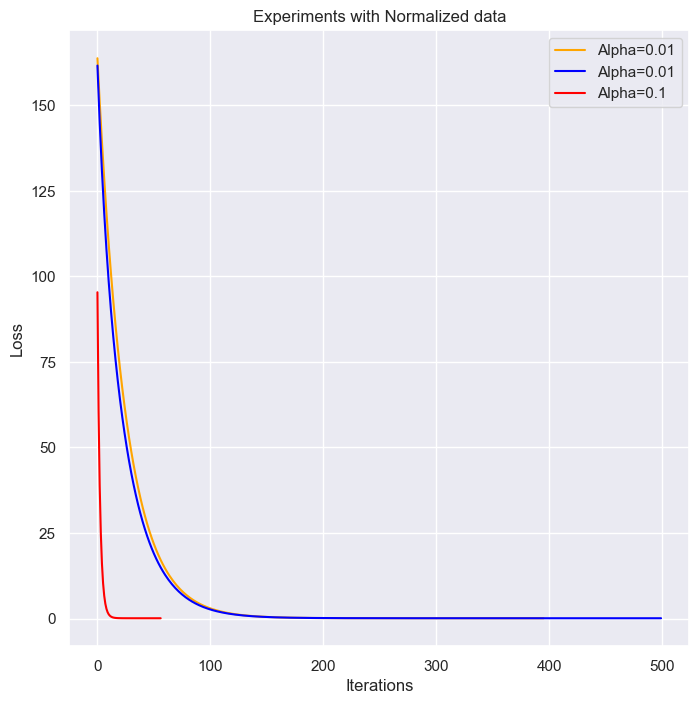

In [16]:
# your code goes here

X_norm = norm(X)

# Experiment 1
alpha_1 = 0.01
w_init_1 = np.zeros(X_norm.shape[1] + 1)
weights_4, losses_4 = gradDescent(w_init_1, alpha_1, X_norm, datY)

# Experiment 2
alpha_2 = 0.01
w_init_2 = np.ones(X_norm.shape[1] + 1)
weights_5, losses_5 = gradDescent(w_init_2, alpha_2, X_norm, datY)

# Experiment 3 
alpha_3 = 0.1
w_init_3 = np.ones(X_norm.shape[1] + 1)
weights_6, losses_6 = gradDescent(w_init_3, alpha_3, X_norm, datY)

# Plot Loss over Iterations
plt.figure(figsize=(8,8))

# Ploting
plt.plot(losses_4, label=f'Alpha={alpha_1}', color='orange')
plt.plot(losses_5, label=f'Alpha={alpha_2}', color='blue')
plt.plot(losses_6, label=f'Alpha={alpha_3}', color='red')
plt.title('Experiments with Normalized data')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.show()

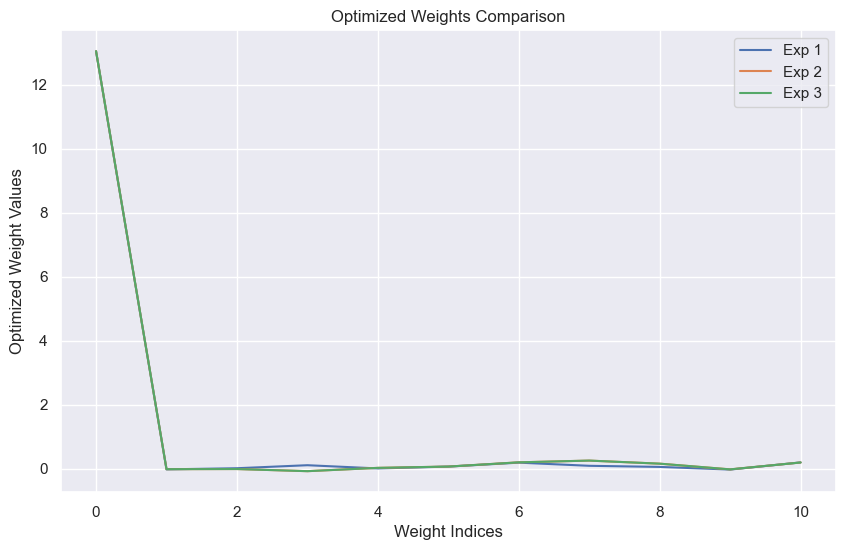

In [17]:
# Plot final optimized weights for each experiment
plt.figure(figsize=(10, 6))
for i, weights in enumerate([weights_4, weights_5, weights_5]):
    plt.plot(weights[-1], label=f'Exp {i + 1}')

plt.title('Optimized Weights Comparison')
plt.xlabel('Weight Indices')
plt.ylabel('Optimized Weight Values')
plt.legend()
plt.show()

In [18]:
# Optimized Weights of Each Experiment
print("Experiment 1 Weights:", weights_4[-1])
print("Experiment 2 Weights:", weights_5[-1])
print("Experiment 3 Weights:", weights_6[-1])

Experiment 1 Weights: [ 1.30445788e+01 -1.93591571e-02  1.60519390e-02  1.10379227e-01
  9.71423280e-03  6.69534642e-02  1.90637808e-01  9.20078440e-02
  5.70797464e-02 -2.57229562e-02  1.97718682e-01]
Experiment 2 Weights: [ 1.30484607e+01 -1.36019300e-02 -9.31229767e-03 -7.58649134e-02
  2.74592134e-02  6.78746132e-02  2.00464401e-01  2.54725855e-01
  1.58587300e-01 -1.96536629e-02  1.95596042e-01]
Experiment 3 Weights: [ 1.30489190e+01 -1.48992177e-02 -3.10221789e-03 -7.60949649e-02
  2.06025830e-02  6.72869890e-02  1.99855573e-01  2.56820744e-01
  1.54166564e-01 -2.22100100e-02  1.95924545e-01]


### Comparing actual prices with predicted prices for each experiment

In [19]:
# Experiment 1
selected_houses = X_norm[:10, :]
selected_houses_changed = np.concatenate([np.ones((selected_houses.shape[0], 1)), selected_houses], axis=1)
y_pred = selected_houses_changed.dot(weights_4[-1])

for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")

House 1 - Actual Price: $13.36, Predicted Price: $13.49
House 2 - Actual Price: $13.03, Predicted Price: $13.23
House 3 - Actual Price: $12.36, Predicted Price: $12.29
House 4 - Actual Price: $12.94, Predicted Price: $12.86
House 5 - Actual Price: $13.22, Predicted Price: $13.41
House 6 - Actual Price: $13.77, Predicted Price: $13.37
House 7 - Actual Price: $12.73, Predicted Price: $12.79
House 8 - Actual Price: $13.81, Predicted Price: $13.94
House 9 - Actual Price: $13.86, Predicted Price: $13.72
House 10 - Actual Price: $13.42, Predicted Price: $12.95


In [20]:
# Experiment 2
y_pred = selected_houses_changed.dot(weights_5[-1])

for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")

House 1 - Actual Price: $13.36, Predicted Price: $13.51
House 2 - Actual Price: $13.03, Predicted Price: $13.25
House 3 - Actual Price: $12.36, Predicted Price: $12.31
House 4 - Actual Price: $12.94, Predicted Price: $12.85
House 5 - Actual Price: $13.22, Predicted Price: $13.44
House 6 - Actual Price: $13.77, Predicted Price: $13.40
House 7 - Actual Price: $12.73, Predicted Price: $12.77
House 8 - Actual Price: $13.81, Predicted Price: $13.94
House 9 - Actual Price: $13.86, Predicted Price: $13.72
House 10 - Actual Price: $13.42, Predicted Price: $12.95


In [21]:
# Experiment 3
y_pred = selected_houses_changed.dot(weights_6[-1])

for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")

House 1 - Actual Price: $13.36, Predicted Price: $13.50
House 2 - Actual Price: $13.03, Predicted Price: $13.25
House 3 - Actual Price: $12.36, Predicted Price: $12.30
House 4 - Actual Price: $12.94, Predicted Price: $12.85
House 5 - Actual Price: $13.22, Predicted Price: $13.43
House 6 - Actual Price: $13.77, Predicted Price: $13.39
House 7 - Actual Price: $12.73, Predicted Price: $12.77
House 8 - Actual Price: $13.81, Predicted Price: $13.94
House 9 - Actual Price: $13.86, Predicted Price: $13.72
House 10 - Actual Price: $13.42, Predicted Price: $12.96


### 8. Better pay twice  

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [22]:
def new_loss(w, X, y, a, b):
    #your code goes here
    X_changed = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    y_pred = np.dot(X_changed, w)
    lossValue = np.mean(np.where(y > y_pred, a * (y - y_pred)**2, b * (y - y_pred)**2))
    return lossValue

def new_grad(w_k, X, y, a, b):
    #your code goes here
    X_changed = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    y_pred = np.dot(X_changed, w_k)
    lossGradient = -2 * np.mean(np.where(y > y_pred, a * (y - y_pred), b * (y - y_pred))[:, np.newaxis] * X_changed, axis=0)
    return lossGradient

### 9. More experiments! 

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [23]:
def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    losses = []
    weights = [w_init]
    curiter = 0
    w_k = weights[-1]
    
    while curiter < maxiter:
        gradient = new_grad(w_k, X, y, a, b)
        if np.linalg.norm(gradient) < eps:
            print(f"Converged after {curiter} iterations.")
            break
        w_k = w_k - alpha * gradient
        lossValue_k = new_loss(w_k, X, y, a, b)
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1     
    return weights, losses

Converged after 260 iterations.
Converged after 349 iterations.
Converged after 32 iterations.


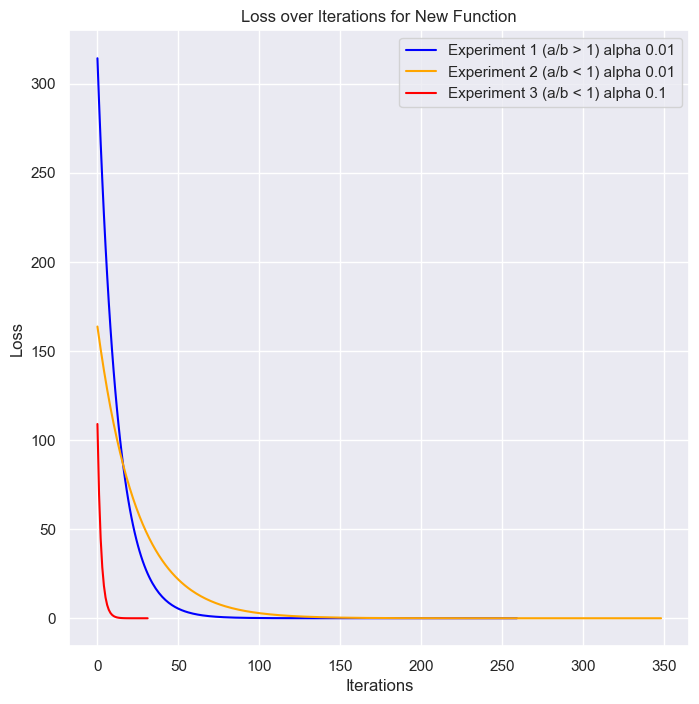

All the weights differ:
Experiment 1 weights: [ 1.31207411e+01 -2.05154483e-02  9.65138639e-03  1.15604934e-01
  4.80855829e-03  6.64395292e-02  1.91073422e-01  9.66941550e-02
  5.91605855e-02 -3.25061675e-02  2.05115613e-01]
Experiment 2 weights: [ 1.29731560e+01 -1.67130969e-02  2.07220898e-02  1.05201586e-01
  1.26391267e-02  6.69291315e-02  1.92251168e-01  8.79553420e-02
  5.39067805e-02 -1.91679504e-02  1.89834721e-01]
Experiment 3 weights: [ 1.29738556e+01 -1.70208296e-02  2.11905612e-02  1.05504618e-01
  1.25550202e-02  6.69183473e-02  1.91344506e-01  8.83274532e-02
  5.38386479e-02 -1.92212935e-02  1.89909903e-01]


In [24]:
X_normalized = norm(X)
# Experiment 1
alpha_1 = 0.01
a_1, b_1 = 2, 1
w_init_1 = np.zeros(X_normalized.shape[1] + 1)
weights_1, losses_1 = new_gradDescent(w_init_1, alpha_1, X_normalized, datY, a_1, b_1)

# Experiment 2
alpha_2 = 0.01
a_2, b_2 = 1, 2
w_init_2 = np.zeros(X_normalized.shape[1] + 1)
weights_2, losses_2 = new_gradDescent(w_init_2, alpha_2, X_normalized, datY, a_2, b_2)

# Experiment 3
alpha_3 = 0.1
a_3, b_3 = 1, 2
w_init_3 = np.zeros(X_normalized.shape[1] + 1)
weights_3, losses_3 = new_gradDescent(w_init_3, alpha_3, X_normalized, datY, a_3, b_3)

# Plot Loss over Iterations
plt.figure(figsize=(8, 8))

# Experiment 1
plt.plot(losses_1, label=f'Experiment 1 (a/b > 1) alpha {alpha_1}', color='blue')

# Experiment 2
plt.plot(losses_2, label=f'Experiment 2 (a/b < 1) alpha {alpha_2}', color='orange')

# Experiment 3
plt.plot(losses_3, label=f'Experiment 3 (a/b < 1) alpha {alpha_3}', color='red')
# Plotting
plt.title('Loss over Iterations for New Function')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Check if weights coincide
coincide_1_2 = np.allclose(weights_1[-1], weights_2[-1], atol=1e-4)
coincide_1_3 = np.allclose(weights_1[-1], weights_3[-1], atol=1e-4)
coincide_2_3 = np.allclose(weights_2[-1], weights_3[-1], atol=1e-4)

# Illustrate coinciding weights or show the differences
if coincide_1_2:
    print("The weights from experiment 1 and 2 coincide.")
if coincide_1_3:
    print("The weights from experiment 1 and 3 coincide.")
if coincide_2_3:
    print("The weights from experiment 2 and 3 coincide.")
else:
    print("All the weights differ:")
print("Experiment 1 weights:", weights_1[-1])
print("Experiment 2 weights:", weights_2[-1])
print("Experiment 3 weights:", weights_3[-1])

### Plot weights

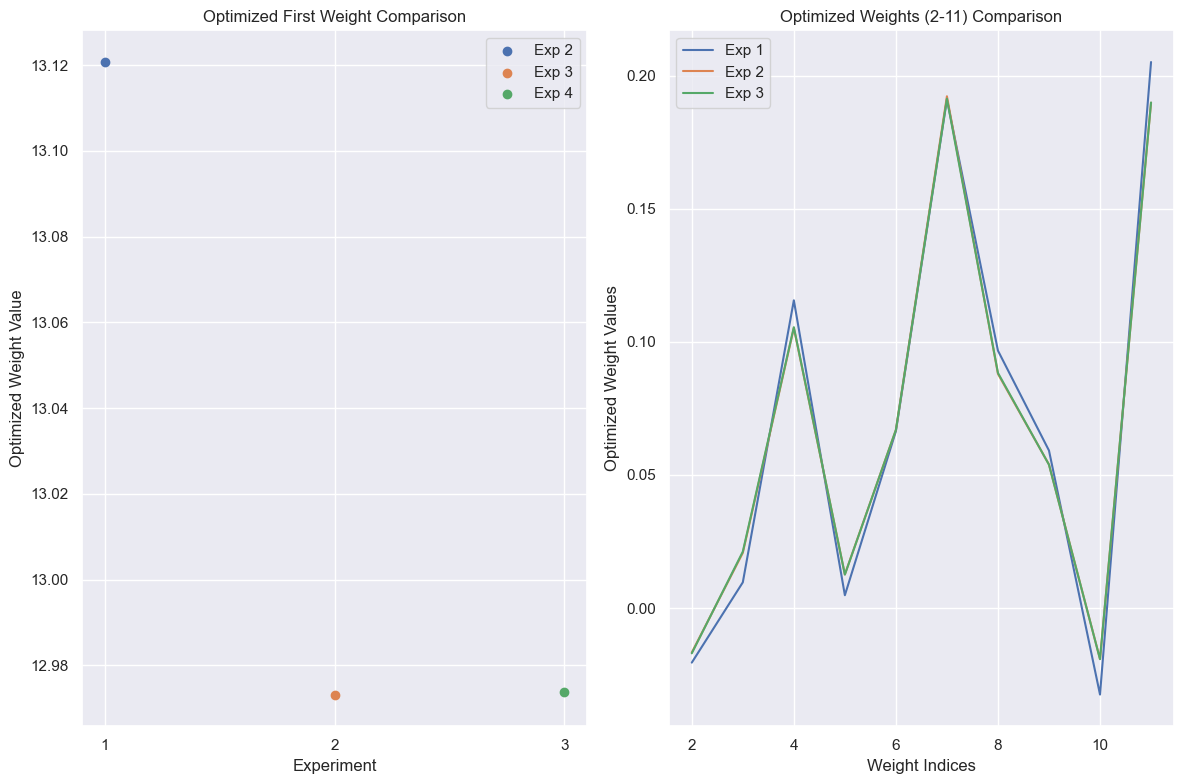

In [25]:
# Plot final optimized weights for each experiment
plt.figure(figsize=(12, 8))

# Plot for the first weight
plt.subplot(1, 2, 1)
for i, weights in enumerate([weights_1, weights_2, weights_3], start=1):
    plt.scatter([i], [weights[-1][0]], label=f'Exp {i+1}')

plt.title('Optimized First Weight Comparison')
plt.xlabel('Experiment')
plt.ylabel('Optimized Weight Value')
plt.xticks([1, 2, 3])  # Set x-axis ticks to experiment numbers
plt.legend()

# Plot for the rest of the weights (2-10)
plt.subplot(1, 2, 2)
for i, weights in enumerate([weights_1, weights_2, weights_3]):
    plt.plot(range(2, 12), weights[-1][1:], label=f'Exp {i+1}')

plt.title('Optimized Weights (2-11) Comparison')
plt.xlabel('Weight Indices')
plt.ylabel('Optimized Weight Values')
plt.legend()

plt.tight_layout()
plt.show()

### Comparing actual prices with predicted prices for each experiment

In [26]:
# Experiment 1
selected_houses = X_normalized[:10, :]
selected_houses_changed = np.concatenate([np.ones((selected_houses.shape[0], 1)), selected_houses], axis=1)
y_pred = selected_houses_changed.dot(weights_1[-1] ) 

for i in range(len(y_pred)):
    print(f"House {i+1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")
print(f'Losses with optimal weights: {losses_1[-1]}')

House 1 - Actual Price: $13.36, Predicted Price: $13.56
House 2 - Actual Price: $13.03, Predicted Price: $13.33
House 3 - Actual Price: $12.36, Predicted Price: $12.36
House 4 - Actual Price: $12.94, Predicted Price: $12.93
House 5 - Actual Price: $13.22, Predicted Price: $13.50
House 6 - Actual Price: $13.77, Predicted Price: $13.46
House 7 - Actual Price: $12.73, Predicted Price: $12.86
House 8 - Actual Price: $13.81, Predicted Price: $14.03
House 9 - Actual Price: $13.86, Predicted Price: $13.80
House 10 - Actual Price: $13.42, Predicted Price: $13.03
Losses with optimal weights: 0.11014562296295892


In [27]:
# Experiment 2
selected_houses = X_normalized[:10, :]
selected_houses_changed = np.concatenate([np.ones((selected_houses.shape[0], 1)), selected_houses], axis=1)
y_pred = selected_houses_changed.dot(weights_2[-1])

for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")
print(f'Losses with optimal weights: {losses_2[-1]}')

House 1 - Actual Price: $13.36, Predicted Price: $13.41
House 2 - Actual Price: $13.03, Predicted Price: $13.14
House 3 - Actual Price: $12.36, Predicted Price: $12.23
House 4 - Actual Price: $12.94, Predicted Price: $12.79
House 5 - Actual Price: $13.22, Predicted Price: $13.33
House 6 - Actual Price: $13.77, Predicted Price: $13.29
House 7 - Actual Price: $12.73, Predicted Price: $12.73
House 8 - Actual Price: $13.81, Predicted Price: $13.86
House 9 - Actual Price: $13.86, Predicted Price: $13.63
House 10 - Actual Price: $13.42, Predicted Price: $12.87
Losses with optimal weights: 0.10481013219004451


In [28]:
# Experiment 3
selected_houses = X_normalized[:10, :]
selected_houses_changed = np.concatenate([np.ones((selected_houses.shape[0], 1)), selected_houses], axis=1)
y_pred = selected_houses_changed.dot(weights_3[-1])

for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")
print(f'Losses with optimal weights: {losses_3[-1]}')

House 1 - Actual Price: $13.36, Predicted Price: $13.42
House 2 - Actual Price: $13.03, Predicted Price: $13.14
House 3 - Actual Price: $12.36, Predicted Price: $12.23
House 4 - Actual Price: $12.94, Predicted Price: $12.79
House 5 - Actual Price: $13.22, Predicted Price: $13.33
House 6 - Actual Price: $13.77, Predicted Price: $13.29
House 7 - Actual Price: $12.73, Predicted Price: $12.73
House 8 - Actual Price: $13.81, Predicted Price: $13.86
House 9 - Actual Price: $13.86, Predicted Price: $13.63
House 10 - Actual Price: $13.42, Predicted Price: $12.87
Losses with optimal weights: 0.10481395785861199


### 10. Discussion 
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

1.  I have managed to obtain sufficiently different weights with different values of alpha and (𝑎,𝑏) parameters of asymmetry. It signify the sensitivity to the chosen hyperparameters. Alpha significantly influences the number of iterations nessesary to get to a convergent. The parameters (𝑎,𝑏) introduce a level of customization to the loss function, affecting how the model penalizes errors differently based on whether predictions are above or below the true values.

2. I conducted an experiment for interval exploration and determined that in order to reach a convergent point in less than 500 iterations, alpha should be at least 0.01. Additionally, I observed that the optimal values for b vary depending on the initialization of weights (w_init). Specifically, when w_init is set to zeros, the optimal b should not exceed 1189, and when w_init is set to ones, the optimal b should not exceed 690. I've written a script to iterate through each value of b and print the best value of b and w_init. It's unnecessary to run the script for the entire range because on our data I noticed that the loss increases as b grows. Thus the best b, which gives the lowest loss is b = 1 with w_init with zeros.

In [29]:
# Initial inputs
a = 1
w_init = [np.zeros(X_normalized.shape[1] + 1), np.ones(X_normalized.shape[1] + 1)]
alpha = 0.01
b_0 = range(1, 10)
b_1 = range(1, 10)
best_b = None
curr_losses = 10
w_init_index = None

# Iteration though different values of w_init
for i in range(len(w_init)):
    
    # If w_init with zeros
    if i == 0:
        print('w_init with zeros')
        # Iteration though different values of b
        for k in b_0:
            try:
                weights, losses = new_gradDescent(w_init[i], alpha, X_normalized, datY, a, k)
                print(f'b = {k}, losses = {losses[-1]}')
                if losses[-1] < curr_losses:
                    best_b = k
                    curr_losses = losses[-1]
                    w_init_index = i
                    print(f'w_init: {w_init_index}, best_b {best_b}, losses: {curr_losses}')
            except Exception:
                pass
    
    # if w_init with ones
    if i == 1:
        print('w_init with ones')
        # Iteration though different values of b
        for k in b_1:
            try:
                weights, losses = new_gradDescent(w_init[i], alpha, X_normalized, datY, a, k)
                print(f'b = {k}, losses = {losses[-1]}')
                if losses[-1] < curr_losses:
                    best_b = k
                    curr_losses = losses[-1]
                    w_init_index = i          
            except Exception:
                pass

print(f'The best hyperparameters: w_init: {w_init_index}, best_b: {best_b}, losses: {curr_losses}')
                

w_init with zeros
Converged after 396 iterations.
b = 1, losses = 0.07705374798454237
w_init: 0, best_b 1, losses: 0.07705374798454237
Converged after 349 iterations.
b = 2, losses = 0.10481013219004451
Converged after 332 iterations.
b = 3, losses = 0.1238881220648935
Converged after 324 iterations.
b = 4, losses = 0.13874068243198226
Converged after 320 iterations.
b = 5, losses = 0.15103489198354486
Converged after 318 iterations.
b = 6, losses = 0.16159588970061164
Converged after 316 iterations.
b = 7, losses = 0.17089757155697197
Converged after 315 iterations.
b = 8, losses = 0.17923670735740174
Converged after 314 iterations.
b = 9, losses = 0.18681737748204152
w_init with ones
b = 1, losses = 0.07725293768173548
b = 2, losses = 0.10485983090511934
Converged after 483 iterations.
b = 3, losses = 0.12389918828032573
Converged after 459 iterations.
b = 4, losses = 0.13874316986202012
Converged after 441 iterations.
b = 5, losses = 0.15103380938185176
Converged after 426 iteration

Converged after 396 iterations.
Converged after 473 iterations.
Converged after 302 iterations.


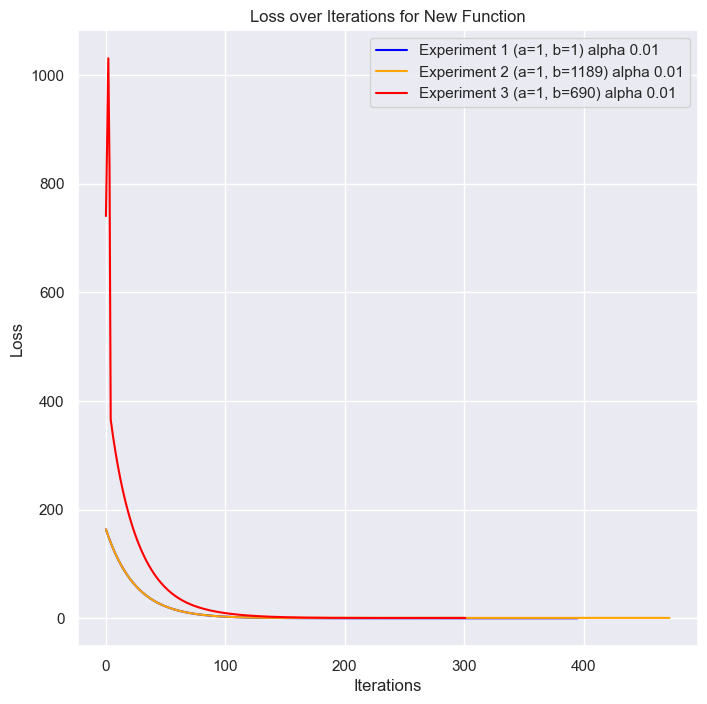

All the weights differ:
Experiment 1 weights: [ 1.30445788e+01 -1.93591571e-02  1.60519390e-02  1.10379227e-01
  9.71423280e-03  6.69534642e-02  1.90637808e-01  9.20078440e-02
  5.70797464e-02 -2.57229562e-02  1.97718682e-01]
Experiment 2 weights: [ 1.23481817e+01  2.95547629e-02  5.89033572e-02  3.86136100e-02
  2.32203336e-02  9.08722786e-02  2.52107888e-01  3.71673799e-02
  1.05983070e-02 -9.06327861e-03  1.50191641e-01]
Experiment 3 weights: [ 1.24061117e+01  2.75505630e-02  5.91772935e-02 -1.46860267e-01
  1.85628590e-02  9.06636379e-02  2.57082465e-01  2.05722396e-01
  1.02731179e-01 -6.04865102e-03  1.55805798e-01]


In [30]:
# Experiment 1
alpha_1 = 0.01
a_1, b_1 = 1, 1
w_init_1 = np.zeros(X_normalized.shape[1] + 1)
weights_1, losses_1 = new_gradDescent(w_init_1, alpha_1, X_normalized, datY, a_1, b_1)

# Experiment 2
alpha_2 = 0.01
a_2, b_2 = 1, 1189
w_init_2 = np.zeros(X_normalized.shape[1] + 1)
weights_2, losses_2 = new_gradDescent(w_init_2, alpha_2, X_normalized, datY, a_2, b_2)

# Experiment 3
alpha_3 = 0.01
a_3, b_3 = 1, 690

w_init_3 = np.ones(X_normalized.shape[1] + 1)
weights_3, losses_3 = new_gradDescent(w_init_3, alpha_3, X_normalized, datY, a_3, b_3)

# Plot Loss over Iterations
plt.figure(figsize=(8, 8))

# Experiment 1
plt.plot(losses_1, label=f'Experiment 1 (a=1, b=1) alpha {alpha_1}', color='blue')

# Experiment 2
plt.plot(losses_2, label=f'Experiment 2 (a=1, b=1189) alpha {alpha_2}', color='orange')

# Experiment 3
plt.plot(losses_3, label=f'Experiment 3 (a=1, b=690) alpha {alpha_3}', color='red')
# Plotting
plt.title('Loss over Iterations for New Function')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Check if weights coincide
coincide_1_2 = np.allclose(weights_1[-1], weights_2[-1], atol=1e-3)
coincide_1_3 = np.allclose(weights_1[-1], weights_3[-1], atol=1e-3)
coincide_2_3 = np.allclose(weights_2[-1], weights_3[-1], atol=1e-3)

# Illustrate coinciding weights or show the differences
if coincide_1_2:
    print("The weights from experiment 1 and 2 coincide.")
if coincide_1_3:
    print("The weights from experiment 1 and 3 coincide.")
if coincide_2_3:
    print("The weights from experiment 2 and 3 coincide.")
else:
    print("All the weights differ:")
print("Experiment 1 weights:", weights_1[-1])
print("Experiment 2 weights:", weights_2[-1])
print("Experiment 3 weights:", weights_3[-1])

### Comparing actual prices with predicted in the experiments

In [31]:
# Experiment 1
selected_houses = X_normalized[:10, :]
selected_houses_changed = np.concatenate([np.ones((selected_houses.shape[0], 1)), selected_houses], axis=1)
y_pred = selected_houses_changed.dot(weights_1[-1] ) 

for i in range(len(y_pred)):
    print(f"House {i+1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")
print(f'Losses with optimal weights: {losses_1[-1]}')

House 1 - Actual Price: $13.36, Predicted Price: $13.49
House 2 - Actual Price: $13.03, Predicted Price: $13.23
House 3 - Actual Price: $12.36, Predicted Price: $12.29
House 4 - Actual Price: $12.94, Predicted Price: $12.86
House 5 - Actual Price: $13.22, Predicted Price: $13.41
House 6 - Actual Price: $13.77, Predicted Price: $13.37
House 7 - Actual Price: $12.73, Predicted Price: $12.79
House 8 - Actual Price: $13.81, Predicted Price: $13.94
House 9 - Actual Price: $13.86, Predicted Price: $13.72
House 10 - Actual Price: $13.42, Predicted Price: $12.95
Losses with optimal weights: 0.07705374798454237


In [32]:
# Experiment 2
selected_houses = X_normalized[:10, :]
selected_houses_changed = np.concatenate([np.ones((selected_houses.shape[0], 1)), selected_houses], axis=1)
y_pred = selected_houses_changed.dot(weights_2[-1])

for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")
print(f'Losses with optimal weights: {losses_3[-1]}')

House 1 - Actual Price: $13.36, Predicted Price: $12.69
House 2 - Actual Price: $13.03, Predicted Price: $12.36
House 3 - Actual Price: $12.36, Predicted Price: $11.60
House 4 - Actual Price: $12.94, Predicted Price: $12.14
House 5 - Actual Price: $13.22, Predicted Price: $12.62
House 6 - Actual Price: $13.77, Predicted Price: $12.58
House 7 - Actual Price: $12.73, Predicted Price: $12.13
House 8 - Actual Price: $13.81, Predicted Price: $13.21
House 9 - Actual Price: $13.86, Predicted Price: $12.89
House 10 - Actual Price: $13.42, Predicted Price: $12.29
Losses with optimal weights: 0.6542348308153277


In [33]:
# Experiment 3
selected_houses = X_normalized[:10, :]
selected_houses_changed = np.concatenate([np.ones((selected_houses.shape[0], 1)), selected_houses], axis=1)
y_pred = selected_houses_changed.dot(weights_3[-1])
print(losses_3[-1])
for i in range(len(y_pred)):
    print(f"House {i + 1} - Actual Price: ${datY[i]:.2f}, Predicted Price: ${y_pred[i]:.2f}")
print(f'Losses with optimal weights: {losses_3[-1]}')

0.6542348308153277
House 1 - Actual Price: $13.36, Predicted Price: $12.75
House 2 - Actual Price: $13.03, Predicted Price: $12.42
House 3 - Actual Price: $12.36, Predicted Price: $11.65
House 4 - Actual Price: $12.94, Predicted Price: $12.18
House 5 - Actual Price: $13.22, Predicted Price: $12.68
House 6 - Actual Price: $13.77, Predicted Price: $12.65
House 7 - Actual Price: $12.73, Predicted Price: $12.18
House 8 - Actual Price: $13.81, Predicted Price: $13.28
House 9 - Actual Price: $13.86, Predicted Price: $12.95
House 10 - Actual Price: $13.42, Predicted Price: $12.35
Losses with optimal weights: 0.6542348308153277


# Author: Vadim Skr